## Preprocessing and Dataset Statistics

In [ ]:
# ! pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

**Importing the Dataset**

In [4]:
movie = pd.read_pickle('cleaned_movie_set.pkl')
movie.head()

,Title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,#1 Cheerleader Camp (2010),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,#Horror (2015),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,#Pellichoopulu (2016),0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Acquiring Genre Correlations**

We want to find genre correlations to see which genre categories are the most highly correlated.

In [5]:
df = movie
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False, kind="quicksort")
genre_corr = so[28::2]
genre_corr[0:28]

Drama        Documentary    0.274506
Animation    Short          0.260361
Adventure    Action         0.246525
Comedy       Drama          0.228739
Horror       Drama          0.223028
Adventure    Animation      0.215504
Comedy       Thriller       0.214372
Family       Animation      0.209395
Crime        Film-Noir      0.186115
Thriller     Horror         0.184386
Horror       Sci-Fi         0.172706
Documentary  Biography      0.171134
Biography    History        0.169102
Animation    Drama          0.162567
Mystery      Thriller       0.160600
Documentary  Comedy         0.160102
Crime        Action         0.157357
Sci-Fi       Drama          0.149632
Adventure    Drama          0.148040
Family       Adventure      0.147692
Horror       Mystery        0.144292
Documentary  News           0.140732
Music        Documentary    0.135527
Romance      Documentary    0.132402
             Comedy         0.129779
Drama        Romance        0.128822
Action       Sci-Fi         0.128365
 

**Acquiring Cumulative Sums and Label Counts**

We want to find how much of each the dataset each genre is a part of.

In [6]:
counts = [] #getting the counts per genre
df = movie
genres = df.columns[2::]
for i in genres:
    counts.append(df[i].value_counts().to_dict())
#creating counts table
counts_df = pd.DataFrame.from_dict(counts)
counts_df[2] = genres
counts_table = counts_df.drop([0], axis=1)
counts_table = counts_table.rename(columns = {1:'counts', 2:'genre'})

# Use sort instead of sort_values if error
# counts_sort = counts_table.sort('counts', ascending=False)
counts_sort = counts_table.sort_values('counts', ascending=False)

#creating column of cumulative sums
sumcol = counts_sort['counts'].sum()
cumsum = counts_sort['counts']/sumcol
counts_sort['cumsum'] = cumsum
counts_sort

,counts,genre,cumsum
7,18168,Drama,0.246623
4,11490,Comedy,0.155972
19,5694,Romance,0.077294
5,4854,Crime,0.065891
24,4487,Thriller,0.060909
13,3770,Horror,0.051176
1,3518,Adventure,0.047755
6,3343,Documentary,0.045380
16,2223,Mystery,0.030176
8,1937,Family,0.026294


**Displaying Correlation Matrix**

We want to graph a heatmap to visualize the correlation matrices.

In [7]:
df = movie
genres = df.columns[1:].tolist()

In [8]:
df_genres = df.drop(df.columns[0],axis = 1)

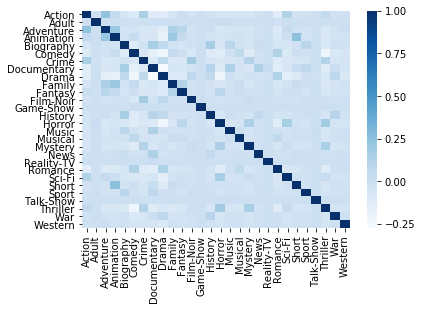

In [9]:
# sb.palplot(sb.color_palette("hls", 7))
R = np.corrcoef(df_genres,rowvar=False)
genre_heatmap = sb.heatmap(R,cmap="Blues",xticklabels=True, yticklabels=True)
genre_heatmap.set_xticklabels(genres, rotation=90)
genre_heatmap.set_yticklabels(genres)
plt.show(genre_heatmap)

As one can see, there are not many categories that are too highly correlated, so we cannot group any categories together.

**Removing Irrelevant Label Genres**

We removed the genres that make up less than 4% of the dataset as there is not enough data to use them.

In [10]:
garb = counts_sort['genre'].where(counts_sort['cumsum']<.04).tolist()
garb = garb[9:28]
garb

['Family',
 'Sci-Fi',
 'Fantasy',
 'Biography',
 'Animation',
 'History',
 'Music',
 'War',
 'Short',
 'Western',
 'Musical',
 'Sport',
 'Film-Noir',
 'News',
 'Adult',
 'Talk-Show',
 'Reality-TV',
 'Game-Show']

In [11]:
clean_df = df #clean dataset without garbage labels
clean_df = clean_df.drop(garb, axis=1) #removing the unwanted genres from our dataset
#clean_df = clean_df.drop(clean_df.columns[0], axis=1)
clean_df.head()

,Title,Action,Adventure,Comedy,Crime,Documentary,Drama,Horror,Mystery,Romance,Thriller
0,#1 Cheerleader Camp (2010),0,0,1,0,0,0,0,0,0,0
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,1,1,0,0,0,0
2,#Horror (2015),0,0,0,0,0,1,1,1,0,0
3,#Pellichoopulu (2016),0,0,1,0,0,1,0,0,1,0
4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0,0,0,0


**New Correlations after Removing Excess Labels**

We want to check the correlation between the genres again

In [12]:
#New Correlations after removing excess labels
c = clean_df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False, kind="quicksort")
genre_corr = so[9::2]
genre_corr[1:12]

Drama      Documentary    0.274506
Adventure  Action         0.246525
Comedy     Drama          0.228739
Horror     Drama          0.223028
Comedy     Thriller       0.214372
Horror     Thriller       0.184386
Thriller   Mystery        0.160600
Comedy     Documentary    0.160102
Crime      Action         0.157357
Adventure  Drama          0.148040
Mystery    Horror         0.144292
dtype: float64

**Dropping Non-Contextual Genres**

In [13]:
sixgenres = clean_df.drop(['Adventure', 'Documentary', 'Mystery','Drama'], axis=1)
sixgenres['sample']=0
sixgenres.head()

,Title,Action,Comedy,Crime,Horror,Romance,Thriller,sample
0,#1 Cheerleader Camp (2010),0,1,0,0,0,0,0
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0
2,#Horror (2015),0,0,0,1,0,0,0
3,#Pellichoopulu (2016),0,1,0,0,1,0,0
4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0


**Checking Cumulative Sums after Removing Non-contextual Genres**

In [14]:
genres = sixgenres.columns[1:].tolist()
counts = []
for i in genres:
    counts.append(sixgenres[i].value_counts().to_dict())
counts_df = pd.DataFrame.from_dict(counts)
counts_df[2] = genres
counts_table = counts_df.drop([0], axis=1)
counts_table = counts_table.rename(columns = {1:'counts', 2:'genre'})
# Use sort instead of sort_values if error
# counts_sort = counts_table.sort('counts', ascending=False)
counts_sort = counts_table.sort_values('counts', ascending=False)

sumcol = counts_sort['counts'].sum()
cumsum = counts_sort['counts']/sumcol
counts_sort['cumsum'] = cumsum
counts_sort

,counts,genre,cumsum
1,11490.0,Comedy,0.325902
4,5694.0,Romance,0.161504
0,4961.0,Action,0.140714
2,4854.0,Crime,0.137679
5,4487.0,Thriller,0.127269
3,3770.0,Horror,0.106932
6,NaN,sample,NaN


**Downsampling Comedy to Balance Label Classes**

In [15]:
col_list = ['Action','Comedy','Crime','Horror','Romance','Thriller']
sixgenres['Empty'] = sixgenres[col_list].sum(axis = 1)
df = sixgenres[sixgenres.Empty != 0]
df.head()

,Title,Action,Comedy,Crime,Horror,Romance,Thriller,sample,Empty
0,#1 Cheerleader Camp (2010),0,1,0,0,0,0,0,1
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1
2,#Horror (2015),0,0,0,1,0,0,0,1
3,#Pellichoopulu (2016),0,1,0,0,1,0,0,2
6,$5 a Day (2008),0,1,0,0,0,0,0,1


In [16]:
comedy = df[df['Comedy'] == 1]
np.random.seed = 1
b = np.random.choice(comedy.Title,size = 4000, replace = False)
df2 = comedy[comedy['Title'].isin(b)]

In [17]:
df3 = df[(df['Title'].isin(df2.Title) & df['Comedy'] == 1) | (df['Comedy'] == 0)]
df4 = df3.drop(df3.columns[-2:],axis= 1)
df4.head(10)

,Title,Action,Comedy,Crime,Horror,Romance,Thriller
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0
2,#Horror (2015),0,0,0,1,0,0
3,#Pellichoopulu (2016),0,1,0,0,1,0
6,$5 a Day (2008),0,1,0,0,0,0
7,$50K and a Call Girl: A Love Story (2014),1,1,0,0,0,0
10,'71 (2014),1,0,0,0,0,1
11,'D' (2005),0,0,1,0,0,1
14,'G' Men (1935),0,0,1,0,0,0
17,'I Know Where I'm Going!' (1945),0,0,0,0,1,0
22,'Pimpernel' Smith (1941),0,0,0,0,0,1


**Double-Checking Class Balance**

In [18]:
genres = df4.columns[1:].tolist()
counts = []
for i in genres:
    counts.append(df4[i].value_counts().to_dict())
    #counts.append((df[i]==1).value_counts().to_dict())
#counts_df = []
counts_df = pd.DataFrame.from_dict(counts)
#counts_df = pd.DataFrame(counts)
#counts_df = pd.DataFrame(counts)
counts_df[2] = genres
#counts_df
counts_table = counts_df.drop([0], axis=1)
#counts_table = counts_table.drop([28])
counts_table = counts_table.rename(columns = {1:'counts', 2:'genre'})

# Use sort instead of sort_values if error:
# counts_sort = counts_table.sort('counts', ascending=False)
counts_sort = counts_table.sort_values('counts', ascending=False)

#counts_sort
sumcol = counts_sort['counts'].sum()
cumsum = counts_sort['counts']/sumcol
counts_sort['cumsum'] = cumsum
counts_sort

,counts,genre,cumsum
5,4324,Thriller,0.179003
0,4321,Action,0.178879
2,4127,Crime,0.170848
1,4000,Comedy,0.165590
4,3993,Romance,0.165301
3,3391,Horror,0.140379


We finished processing the data to have 6 classes, which will help model accuracy and speed. We also downsampled large parts of the data (Comedy) to have more balanced classes that will help our model train better.

**Pickling the new dataframe**

In [17]:
df4.to_pickle("Top6.pkl")